In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
W=pd.read_csv('Movies_dataset.csv')
W.head()

,index,title,original_language,release_date,popularity,vote_average,vote_count,overview
0,0,Spider-Man: Across the Spider-Verse,en,31-05-2023,3368.627,8.5,3386,"After reuniting with Gwen Stacy, Brooklyn’s fu..."
1,1,Transformers: Rise of the Beasts,en,06-06-2023,2160.316,7.5,2747,When a new threat capable of destroying the en...
2,2,The Flash,en,13-06-2023,2108.713,7.0,2305,When his attempt to save his family inadverten...
3,3,No Hard Feelings,en,15-06-2023,1978.358,7.1,562,"On the brink of losing her childhood home, Mad..."
4,4,Barbie,en,19-07-2023,1976.513,7.5,3013,Barbie and Ken are having the time of their li...


In [4]:
W.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              10000 non-null  int64  
 1   title              10000 non-null  object 
 2   original_language  10000 non-null  object 
 3   release_date       9982 non-null   object 
 4   popularity         10000 non-null  float64
 5   vote_average       10000 non-null  float64
 6   vote_count         10000 non-null  int64  
 7   overview           9905 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 468.8+ KB


In [5]:
A=W['release_date'].isnull()
A.nunique() #counts type of unique information in this case two

2

In [6]:
Z=W.dropna()
R=Z.isnull()
R.value_counts()

index  title  original_language  release_date  popularity  vote_average  vote_count  overview
False  False  False              False         False       False         False       False       9892
dtype: int64

#### Now we have 9892 rows of data.

In [7]:
R.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9892 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   index              9892 non-null   bool 
 1   title              9892 non-null   bool 
 2   original_language  9892 non-null   bool 
 3   release_date       9892 non-null   bool 
 4   popularity         9892 non-null   bool 
 5   vote_average       9892 non-null   bool 
 6   vote_count         9892 non-null   bool 
 7   overview           9892 non-null   bool 
dtypes: bool(8)
memory usage: 154.6 KB


In [8]:
Z['original_language'].nunique()

48

#### This data contains 48 different type of languages movies. 

In [9]:
Z['original_language'].unique()

array(['en', 'pl', 'ja', 'ar', 'fr', 'uk', 'es', 'fi', 'nl', 'ko', 'zh',
       'cn', 'de', 'it', 'tl', 'ru', 'no', 'hi', 'tr', 'te', 'th', 'id',
       'sv', 'da', 'ga', 'ta', 'cs', 'pt', 'sr', 'kn', 'gl', 'vi', 'el',
       'bn', 'ml', 'ro', 'pa', 'fa', 'ka', 'dz', 'eu', 'km', 'hu', 'la',
       'lv', 'nb', 'ur', 'kk'], dtype=object)

#### These are different type of languages 

In [10]:
M=Z['original_language'].value_counts()
M.nlargest(15)

en    7154
ja     680
ko     425
fr     335
es     275
it     170
zh     154
cn     145
ru      80
de      77
tl      52
hi      50
no      33
th      31
sv      26
Name: original_language, dtype: int64

#### Number of movies from some different languages

In [11]:
Z['vote_count'].idxmax()

195

In [12]:
B = Z[Z['vote_count'] ==Z['vote_count'].max()]
B

,index,title,original_language,release_date,popularity,vote_average,vote_count,overview
195,195,Inception,en,15-07-2010,122.994,8.4,34245,"Cobb, a skilled thief who commits corporate es..."
202,202,Inception,en,15-07-2010,122.994,8.4,34245,"Cobb, a skilled thief who commits corporate es..."


#### As from this we can deduce that some movie  names are repeating itself

In [13]:
Z['title'].nunique()

9157

In [14]:
Z[Z['title']=='Inception']

,index,title,original_language,release_date,popularity,vote_average,vote_count,overview
195,195,Inception,en,15-07-2010,122.994,8.4,34245,"Cobb, a skilled thief who commits corporate es..."
202,202,Inception,en,15-07-2010,122.994,8.4,34245,"Cobb, a skilled thief who commits corporate es..."


In [15]:
Z[Z['title']=='The Little Mermaid']

,index,title,original_language,release_date,popularity,vote_average,vote_count,overview
12,12,The Little Mermaid,en,18-05-2023,1268.064,6.5,1598,"The youngest of King Triton’s daughters, and t..."
247,247,The Little Mermaid,en,17-11-1989,107.954,7.4,7237,This colorful adventure tells the story of an ...
2868,2868,The Little Mermaid,en,02-08-2018,26.830,5.0,809,A young reporter and his niece discover a beau...


#### From above 3 cell we can see that 9157 unique name are there but movies like 'The Little Mermaid' are 
#### made multiple times and movies like 'Inception' are mentioned twice.

In [16]:
Z= Z.drop_duplicates(subset=['overview'])
Z[Z['title']=='The Little Mermaid']

,index,title,original_language,release_date,popularity,vote_average,vote_count,overview
12,12,The Little Mermaid,en,18-05-2023,1268.064,6.5,1598,"The youngest of King Triton’s daughters, and t..."
247,247,The Little Mermaid,en,17-11-1989,107.954,7.4,7237,This colorful adventure tells the story of an ...
2868,2868,The Little Mermaid,en,02-08-2018,26.830,5.0,809,A young reporter and his niece discover a beau...


In [17]:
Z[Z['title']=='Inception']

,index,title,original_language,release_date,popularity,vote_average,vote_count,overview
195,195,Inception,en,15-07-2010,122.994,8.4,34245,"Cobb, a skilled thief who commits corporate es..."


In [18]:
Z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9457 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              9457 non-null   int64  
 1   title              9457 non-null   object 
 2   original_language  9457 non-null   object 
 3   release_date       9457 non-null   object 
 4   popularity         9457 non-null   float64
 5   vote_average       9457 non-null   float64
 6   vote_count         9457 non-null   int64  
 7   overview           9457 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 517.2+ KB


#### The above problem has bee resolved and now we have 9457 rows of data

In [19]:
Z.groupby('original_language')['vote_count'].max().nlargest(10)

original_language
en    34245
ko    16197
fr    15948
ja    14717
it    12107
es     9769
pl     8382
pt     6616
hi     4219
tr     4177
Name: vote_count, dtype: int64

#### This shows highest vote count for each language

In [20]:
Z.groupby('title')['title'].count().nlargest(8)

title
Beauty and the Beast              4
Cinderella                        4
Prey                              4
The Three Musketeers              4
Alice in Wonderland               3
All Quiet on the Western Front    3
Carrie                            3
Escape Room                       3
Name: title, dtype: int64

#### This shows number of movies with same title

In [21]:
Z.groupby('release_date')['title'].count().nlargest(10)

release_date
15-08-2023    49
18-08-2023    22
17-08-2023    19
16-08-2023    16
18-11-2022    14
21-04-2023    14
07-04-2023    13
12-02-2021    13
30-09-2022    13
10-02-2023    11
Name: title, dtype: int64

#### Highest number of movies released on same date

In [22]:
def sp(Q):
    Q1=Q.split('-')
    return Q1[2]

Z['year']=Z['release_date'].apply(sp)
Z.head(2)

,index,title,original_language,release_date,popularity,vote_average,vote_count,overview,year
0,0,Spider-Man: Across the Spider-Verse,en,31-05-2023,3368.627,8.5,3386,"After reuniting with Gwen Stacy, Brooklyn’s fu...",2023
1,1,Transformers: Rise of the Beasts,en,06-06-2023,2160.316,7.5,2747,When a new threat capable of destroying the en...,2023


In [23]:
Z.groupby('year')['title'].count().nlargest(8)

year
2022    720
2023    635
2021    480
2019    450
2020    404
2018    389
2017    384
2016    332
Name: title, dtype: int64

#### Highest number of movies released in particular year

In [24]:
Z1=Z.groupby('original_language').apply(lambda group:group[group['popularity'] == group['popularity'].max()])
Z1.reset_index(drop=True, inplace=True)
Z1[['title','popularity','original_language']]

,title,popularity,original_language
0,Head to Head,975.929,ar
1,Cosmic Sex,22.441,bn
2,Sex and Zen II,178.809,cn
3,Il Boemo,37.812,cs
4,A Beautiful Life,39.400,da
5,Paradise,152.363,de
6,Lunana: A Yak in the Classroom,16.878,dz
7,Emmanuelle: Queen of Sados,22.526,el
8,Spider-Man: Across the Spider-Verse,3368.627,en
9,La Leyenda de los Chaneques,495.160,es


#### These are most popular movie in every language

In [25]:
Z2=Z.groupby('original_language').apply(lambda group:group[group['popularity'] == group['popularity'].min()])
Z2.reset_index(drop=True, inplace=True)
Z2[['title','popularity','original_language']]

,title,popularity,original_language
0,Capernaum,17.993,ar
1,Eklavya,14.760,bn
2,Temptation Summary,10.955,cn
3,The Painted Bird,13.511,cs
4,Ronal the Barbarian,12.852,da
5,Free Fall,12.626,de
6,Lunana: A Yak in the Classroom,16.878,dz
7,Nefeli,13.044,el
8,The Lazarus Effect,8.865,en
9,The Pope: Answers,12.631,es


#### This are least popular movie in every language

## All original _language ('hi') movies

In [29]:
h = Z[Z['original_language'] =='hi']
h

,index,title,original_language,release_date,popularity,vote_average,vote_count,overview,year
319,319,Gadar: Ek Prem Katha,hi,15-06-2001,93.418,6.5,45,Amongst the communal riots that erupt in the c...,2001
1364,1364,Adipurush,hi,16-06-2023,41.603,4.8,14,"7000 years ago, Ayodhya's Prince Raghava and P...",2023
1657,1657,OMG 2,hi,11-08-2023,37.259,8.5,2,Life is bliss until one day Kanti Sharan Mudga...,2023
1812,1812,Dilwale Dulhania Le Jayenge,hi,20-10-1995,35.255,8.6,4219,"Raj is a rich, carefree, happy-go-lucky second...",1995
2601,2601,Dangal,hi,21-12-2016,28.454,8.0,852,Dangal is an extraordinary true story based on...,2016
2606,2606,3 Idiots,hi,23-12-2009,28.423,8.0,2131,Rascal. Joker. Dreamer. Genius... You've never...,2009
2858,2858,Pathaan,hi,25-01-2023,26.879,6.7,99,A soldier caught by enemies and presumed dead ...,2023
3259,3259,Lust Stories 2,hi,29-06-2023,24.709,5.4,19,"Four eminent Indian directors explore sex, des...",2023
3628,3628,Sooryavanshi,hi,05-11-2021,23.234,5.8,138,"A fearless, faithful albeit slightly forgetful...",2021
4014,4014,Sholay,hi,15-08-1975,21.993,7.0,234,After his family is murdered by a notorious an...,1975


In [33]:
h.groupby('year')['year'].count()

year
1971    1
1975    1
1979    1
1995    1
1998    1
2000    1
2001    1
2002    1
2004    3
2006    2
2007    4
2008    1
2009    1
2010    2
2011    2
2012    2
2013    1
2015    2
2016    1
2018    3
2019    2
2020    3
2021    2
2022    2
2023    9
Name: year, dtype: int64

Text(0.5, 1.0, 'Histogram of hi movies')

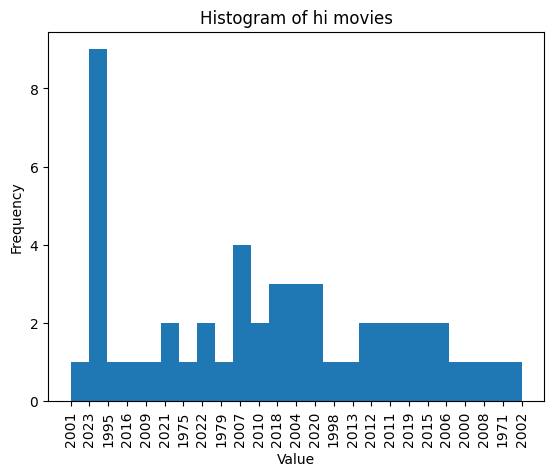

In [39]:
plt.hist(h['year'], bins=25)
plt.xticks(rotation=90) 
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of hi movies')

In [42]:
h[h['vote_count']==h['vote_count'].max()]

,index,title,original_language,release_date,popularity,vote_average,vote_count,overview,year
1812,1812,Dilwale Dulhania Le Jayenge,hi,20-10-1995,35.255,8.6,4219,"Raj is a rich, carefree, happy-go-lucky second...",1995


#### Best vote_count for amovie

In [77]:
h[h['popularity']==h['popularity'].max()]

,index,title,original_language,release_date,popularity,vote_average,vote_count,overview,year
319,319,Gadar: Ek Prem Katha,hi,15-06-2001,93.418,6.5,45,Amongst the communal riots that erupt in the c...,2001


#### Best popularity

In [78]:
h[h['vote_average']==h['vote_average'].max()]

,index,title,original_language,release_date,popularity,vote_average,vote_count,overview,year
1812,1812,Dilwale Dulhania Le Jayenge,hi,20-10-1995,35.255,8.6,4219,"Raj is a rich, carefree, happy-go-lucky second...",1995


#### Best vote_average

In [66]:
h2=h[h['year']=='2023']
h2

,index,title,original_language,release_date,popularity,vote_average,vote_count,overview,year
1364,1364,Adipurush,hi,16-06-2023,41.603,4.8,14,"7000 years ago, Ayodhya's Prince Raghava and P...",2023
1657,1657,OMG 2,hi,11-08-2023,37.259,8.5,2,Life is bliss until one day Kanti Sharan Mudga...,2023
2858,2858,Pathaan,hi,25-01-2023,26.879,6.7,99,A soldier caught by enemies and presumed dead ...,2023
3259,3259,Lust Stories 2,hi,29-06-2023,24.709,5.4,19,"Four eminent Indian directors explore sex, des...",2023
4515,4515,Satyaprem Ki Katha,hi,29-06-2023,20.444,6.7,7,Sattu is a good-hearted but good-for-nothing L...,2023
5526,5526,Chor Nikal Ke Bhaga,hi,24-03-2023,18.114,7.2,90,A flight attendant and her boyfriend must stea...,2023
8357,8357,Ghoomer,hi,18-08-2023,14.043,0.0,0,Inspired by the incredible achievement of Hung...,2023
8971,8971,Rocky Aur Rani Kii Prem Kahaani,hi,28-07-2023,13.478,7.0,10,"Gym-freak brat Rocky falls in love with Rani, ...",2023
9360,9360,Akelli,hi,18-08-2023,13.110,0.0,0,An ordinary Indian girl gets trapped in a war-...,2023


In [52]:
h1=h[h['title']=='Rocky Aur Rani Kii Prem Kahaani']
h1['overview']

8971    Gym-freak brat Rocky falls in love with Rani, ...
Name: overview, dtype: object

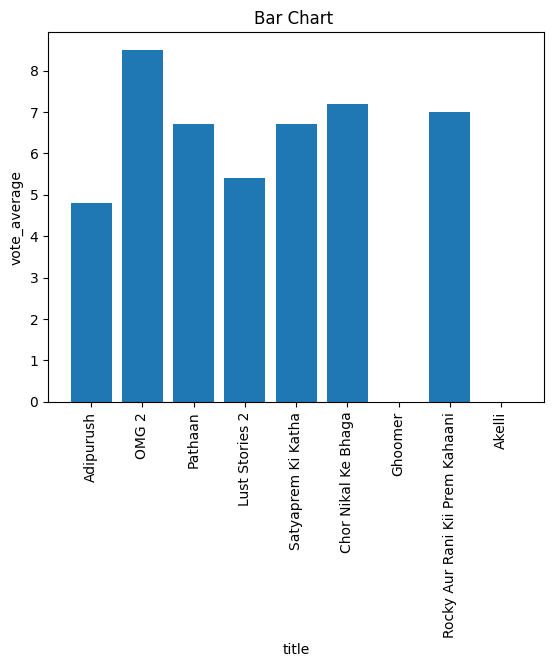

In [75]:
plt.bar(h2['title'],h2['vote_average'])
plt.xlabel('title')
plt.ylabel('vote_average')
plt.title('Bar Chart ')
plt.xticks(rotation=90)
plt.show()

## All movies

#### Best vote_count for a movie

In [79]:
Z[Z['vote_count']==Z['vote_count'].max()]

,index,title,original_language,release_date,popularity,vote_average,vote_count,overview,year
195,195,Inception,en,15-07-2010,122.994,8.4,34245,"Cobb, a skilled thief who commits corporate es...",2010


#### Best popularity for a movie

In [80]:
Z[Z['popularity']==Z['popularity'].max()]

,index,title,original_language,release_date,popularity,vote_average,vote_count,overview,year
0,0,Spider-Man: Across the Spider-Verse,en,31-05-2023,3368.627,8.5,3386,"After reuniting with Gwen Stacy, Brooklyn’s fu...",2023


#### Best vote_average for a movie

In [81]:
Z[Z['vote_average']==Z['vote_average'].max()]

,index,title,original_language,release_date,popularity,vote_average,vote_count,overview,year
302,302,Manyak,tl,04-08-2023,82.718,10.0,1,"Desire and her boyfriend, Adam, stay at her si...",2023
366,366,Pretty Young Sister 4,ko,15-01-2021,85.301,10.0,1,Jeong-woo who is tired of instant food and liv...,2021
380,380,Female Boss Hooker,ko,31-08-2020,82.915,10.0,1,Ji-cheol is a job seeker who only plays and ea...,2020
1200,1200,Horseplay,es,01-06-2023,39.857,10.0,1,"In the heat of the summer, Andy leaves the cit...",2023
2100,2100,Abducted by My Teacher: The Elizabeth Thomas S...,en,12-08-2023,20.282,10.0,1,"The story of Elizabeth Thomas, a 15-year-old h...",2023
2321,2321,Love in Taipei,en,10-08-2023,30.811,10.0,1,A young American woman is sent by her parents ...,2023
3022,3022,"Nicole Kidman, eyes wide open",fr,04-06-2023,25.879,10.0,1,"Over the years, Nicole Kidman, Oscar and two-t...",2023
3630,3630,Dreams and Crumbs,es,25-07-2023,23.228,10.0,1,Javi and Dani go around the city trying to sel...,2023
3993,3993,You Are So Not Invited to My Bat Mitzvah,en,18-08-2023,22.027,10.0,1,Stacy and Lydia are BFFs who've always dreamed...,2023
4156,4156,Female Hostel 3,ko,11-06-2019,21.503,10.0,1,Lonely boarding house women! Any man who goes ...,2019
